<font size=6><b> lec06.머신러닝 : 평가 매트릭스 : Binary case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
sns.set()


# Data Load

## make_classification() 
* ref : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

<pre>
n_samples : 표본 데이터의 수, 디폴트 100
+ n_features : 독립 변수의 수, 디폴트 20
     - n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
     - n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
     - n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
+ n_classes : 종속 변수의 클래스 수, 디폴트 2
+ n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
weights : 각 클래스에 할당된 표본 수
random_state : 난수 발생 시드

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

# ------------------------------------------------------------------------------------------------------------
# "Number of informative, redundant and repeated features" must sum to less than the number of "total features"
# n_classes(5) * n_clusters_per_class(2) must be smaller or equal 2**n_informative(2)=4
# ------------------------------------------------------------------------------------------------------------
X, y = make_classification(n_samples=16, n_features=2, 
                           n_informative=2, n_classes=2,             #---------(16*2) target 이진분류(0,1)
                           n_clusters_per_class=1, n_redundant=0,
                           # weights=[0.9, 0.1],                     #--------- 비대칭 데이터
                           random_state=1111)

X, y

(array([[-2.69623724,  0.33697474],
        [-1.44462928,  0.87327533],
        [ 1.20111224,  1.86953492],
        [-1.65650218,  0.91159718],
        [-1.05597432, -0.06628841],
        [-1.73028707,  0.66204133],
        [-0.42481334,  0.15827256],
        [ 0.72606437,  1.60563018],
        [-0.9595514 ,  1.52783007],
        [ 1.71712359,  1.81943473],
        [-0.49556254,  0.26356466],
        [ 0.43294294,  0.25493233],
        [ 0.0818844 ,  1.36528131],
        [-1.62980463,  1.04699717],
        [ 2.24057858,  1.89947555],
        [-0.644468  ,  0.72204137]]),
 array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]))

In [3]:
model = LogisticRegression().fit(X, y)
pred = model.predict(X)
fval = model.decision_function(X)
print(pred.shape, fval.shape)
df = pd.DataFrame(np.vstack([y, pred, fval]).T, columns=["정답", "예측값", "함수판별값"])
df.sort_values("함수판별값", ascending=False).reset_index(drop=True)

(16,) (16,)


,정답,예측값,함수판별값
0,1.0,1.0,3.068794
1,1.0,1.0,1.821582
2,1.0,1.0,1.796082
3,1.0,1.0,1.785720
4,1.0,1.0,1.461787
5,1.0,1.0,1.054386
6,1.0,1.0,0.429373
7,0.0,1.0,0.196148
8,0.0,0.0,-0.246902
9,0.0,0.0,-0.403136


## read_csv()

In [4]:
df = pd.read_csv("./dataset/pima_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 샘플링(N개)

In [6]:
dfs_1 = df[df['Outcome']==1].sample(n=3, random_state=1111)
print(dfs_1.shape)
dfs_1.head()

(3, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
25,10,125,70,26,115,31.1,0.205,41,1
132,3,170,64,37,225,34.5,0.356,30,1
283,7,161,86,0,0,30.4,0.165,47,1


### 샘플링(N%)

In [7]:
dfs = df.sample(frac=0.02, random_state=1111)
print(dfs.shape)
dfs.head()

(15, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
32,3,88,58,11,54,24.8,0.267,22,0
348,3,99,62,19,74,21.8,0.279,26,0
227,3,162,52,38,0,37.2,0.652,24,1
129,0,105,84,0,0,27.9,0.741,62,1
495,6,166,74,0,0,26.6,0.304,66,0


In [8]:
dfs["Outcome"].value_counts()

0    10
1     5
Name: Outcome, dtype: int64

* 샘플링 값이 다를 경우 아래 코드 실행
* print(dfs.values.tolist())

In [9]:
# slist = [[3.0, 88.0, 58.0, 11.0, 54.0, 24.8, 0.267, 22.0, 0.0], [3.0, 99.0, 62.0, 19.0, 74.0, 21.8, 0.279, 26.0, 0.0], [3.0, 162.0, 52.0, 38.0, 0.0, 37.2, 0.652, 24.0, 1.0], [0.0, 105.0, 84.0, 0.0, 0.0, 27.9, 0.741, 62.0, 1.0], [6.0, 166.0, 74.0, 0.0, 0.0, 26.6, 0.304, 66.0, 0.0], [5.0, 121.0, 72.0, 23.0, 112.0, 26.2, 0.245, 30.0, 0.0], [1.0, 164.0, 82.0, 43.0, 67.0, 32.8, 0.341, 50.0, 0.0], [7.0, 178.0, 84.0, 0.0, 0.0, 39.9, 0.331, 41.0, 1.0], [4.0, 94.0, 65.0, 22.0, 0.0, 24.7, 0.148, 21.0, 0.0], [5.0, 77.0, 82.0, 41.0, 42.0, 35.8, 0.156, 35.0, 0.0], [2.0, 56.0, 56.0, 28.0, 45.0, 24.2, 0.332, 22.0, 0.0], [6.0, 154.0, 74.0, 32.0, 193.0, 29.3, 0.839, 39.0, 0.0], [12.0, 140.0, 82.0, 43.0, 325.0, 39.2, 0.528, 58.0, 1.0], [0.0, 125.0, 68.0, 0.0, 0.0, 24.7, 0.206, 21.0, 0.0], [13.0, 152.0, 90.0, 33.0, 29.0, 26.8, 0.731, 43.0, 1.0]]
# temp = pd.DataFrame(slist, columns=dfs.columns)
# temp[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age', 'Outcome']] = temp[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age', 'Outcome']].astype("int")
# temp.head()

# 모델 학습

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [11]:
y = dfs['Outcome']
X = dfs.drop(['Outcome'], axis=1)
model = LogisticRegression().fit(X, y)
pred = model.predict(X)
fval = model.decision_function(X)

# 평가

## 판별함수 값
* predict_proba(), decision_function()

In [12]:
np.vstack([y, pred, fval]).T

array([[ 0.        ,  0.        , -5.10972459],
       [ 0.        ,  0.        , -7.36930449],
       [ 1.        ,  1.        ,  0.5697434 ],
       [ 1.        ,  0.        , -0.61811266],
       [ 0.        ,  1.        ,  0.42048825],
       [ 0.        ,  0.        , -3.57335804],
       [ 0.        ,  0.        , -1.40823218],
       [ 1.        ,  1.        , 10.91532963],
       [ 0.        ,  0.        , -4.84014848],
       [ 0.        ,  0.        , -0.05380582],
       [ 0.        ,  0.        , -8.79398389],
       [ 0.        ,  0.        , -2.37403597],
       [ 1.        ,  1.        ,  1.97902946],
       [ 0.        ,  0.        , -1.9598469 ],
       [ 1.        ,  1.        ,  0.67364364]])

In [13]:
pred_df = pd.DataFrame(np.vstack([y, pred, fval]).T, columns=["정답", "예측값", "함수판별값"])
pred_df.sort_values("함수판별값", ascending=False).reset_index(drop=True)

,정답,예측값,함수판별값
0,1.0,1.0,10.915330
1,1.0,1.0,1.979029
2,1.0,1.0,0.673644
3,1.0,1.0,0.569743
4,0.0,1.0,0.420488
5,0.0,0.0,-0.053806
6,1.0,0.0,-0.618113
7,0.0,0.0,-1.408232
8,0.0,0.0,-1.959847
9,0.0,0.0,-2.374036


* 기준값(threshold)>0 : 양성(Positive)
* 기준값(threshold)<0 : 음성(negative)
* 기준값(threshold)을 얼마로 설정하냐에 따라 성능평가 점수가 달라진다

## confusion_matrix()

<img src="https://velog.velcdn.com/images%2Fhajeongjj%2Fpost%2F31affec5-a47b-4ff0-b07d-73943729dbc3%2Fimage.png" width=800><br>
* FPR = fallout = (1-TNR)
* TPR (recall)

<table style="border-collapse: collapse; width: 805px; box-sizing: border-box; border-spacing: 0px; max-width: 100%;" border="0" width="805" cellspacing="0" cellpadding="0" data-ke-align="alignLeft"><colgroup><col style="width: 221pt;" width="294"> <col style="mso-width-source: userset; mso-width-alt: 6619; width: 136pt;" width="181"> <col style="width: 221pt;" width="294"> </colgroup>
<tbody>
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl63" style="height: 20px; width: 154px; border: 1px solid #8c8c8c;" width="294" height="20"><span>용어</span></td>
<td class="xl63" style="border-left: none; width: 88px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-top: 1px solid #8c8c8c; height: 20px;" width="181"><span>산출식</span></td>
<td class="xl63" style="border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-top: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="294"><span>설명</span></td>
<td class="xl63" style="border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-top: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" colspan="1" width="294"><span>&nbsp;예</span></td>
</tr>
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 35px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">Accuracy </td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="181"><b>(TP+TN)/(TP+TN+FP+FN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="294">탐지율 : 맞게 예측한 비율</td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" colspan="1" width="294"><span>실제 악성/정상인지 맞게 예측한 비율</span></td>
</tr>
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 20px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">Precision <font size=5 color=red><b> ↓↓ </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="181"><b>TP/(TP+FP)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="294"><span>정확도&nbsp;: P로 예측한 것중 실제P의 비율</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" colspan="1" width="294"><span>악성으로 예측한것 중 실제 악성인 샘플의 비율</span></td>
</tr>
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 20px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">Recall <font size=5 color=red><b> →→ </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="181"><b>TP/(TP+FN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="294"><span>재현율 : 실제 P를 P로 예측한 비율</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" colspan="1" width="294"><span>실제 악성 샘플 중 악성으로 예측한 비율</span></td>
</tr>

    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 15pt; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">TPR<span>&nbsp;(True Positive Rate)&nbsp;</span><span>= Recall</span>  <font size=5 color=red><b> →→ </b></font> </td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="181"><b>TP/(TP+FN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="294"><span>민감도(Sensitivity) : 예측과 실제 모두 P&nbsp;</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" colspan="1" width="294"><span>실제 악성 샘플을 악성으로 예측한 비율</span></td>
</tr>

<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 35px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">Fall-out<font size=5 color=red><b> → </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="181"><b>FP/(FP+TN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="294">오예측율 : 실제 N을 P로 예측한 비율</td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" colspan="1" width="294"><span>실제 정상 샘플을 악성으로 예측한 비율</span></td>
</tr>    
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 15pt; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">FPR<span>&nbsp;(False Positive Rate)&nbsp;</span><span>= Fall-out</span> <font size=5 color=red><b> → </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="181"><b>FP/(FP+TN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="294"><span>실제 N인데 P로 예측</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" colspan="1" width="294"><span>실제 정상 샘플을 악성으로 예측한 비율</span></td>
</tr>
 
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 35px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20"><span>TNR</span><br><span>&nbsp;(True Negative Rate)</span> <font size=5 color=red><b> ← </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="181"><b>TN/(TN+FP)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="294"><span>특이도 : 예측과 실제 모두 N</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" colspan="1" width="294"><span>실제 정상 샘플을 정상으로 예측한 비율</span></td>
</tr>
    
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 15pt; border-top: none; width: 154px; box-sizing: border-box; border-right: 1px solid #8c8c8c; border-bottom: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">FNR<span>&nbsp;(False Negative Rate)</span> <font size=5 color=red><b> ←← </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-right: 1px solid #8c8c8c; border-bottom: 1px solid #8c8c8c;" width="181"><b>FN/(TP+FN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="294"><span>실제 P인데 N으로 예측</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" colspan="1" width="294"><span>실제 악성 샘플을 정상으로 예측한 비율</span></td>
</tr>
    

</tbody>
</table>

In [14]:
confusion_matrix(y, pred)

array([[9, 1],
       [1, 4]], dtype=int64)

In [15]:
recall = 4 / (1 + 4)
fallout = 1 / (9 + 1)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.8
fallout = 0.1


## classification_report()

In [16]:
print(  classification_report(y, pred)  )

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.87      0.87      0.87        15



## roc_curve()
* 양성에 대한 오답/정답 비율 시각화

In [17]:
from sklearn.metrics import roc_curve

### decision_function()

In [18]:
fval = model.decision_function(X)
fpr, tpr, thresholds = roc_curve(y, fval)
fpr, tpr, thresholds

(array([0. , 0. , 0. , 0.2, 0.2, 1. ]),
 array([0. , 0.2, 0.8, 0.8, 1. , 1. ]),
 array([11.91532963, 10.91532963,  0.5697434 , -0.05380582, -0.61811266,
        -8.79398389]))

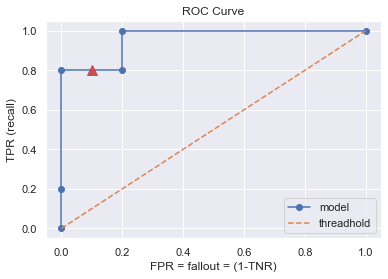

In [19]:
plt.plot(fpr, tpr, 'o-', label="model")
plt.plot([0, 1], [0, 1], '--', label="threadhold")
plt.plot(fallout, recall, 'r^', ms=10)
plt.xlabel('FPR = fallout = (1-TNR)')
plt.ylabel('TPR (recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

### predict_proba()

In [20]:
fval = model.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, fval[:, 1])  #--------------- 주의주의
fpr, tpr, thresholds

(array([0. , 0. , 0. , 0.2, 0.2, 1. ]),
 array([0. , 0.2, 0.8, 0.8, 1. , 1. ]),
 array([1.99998182e+00, 9.99981823e-01, 6.38703964e-01, 4.86551789e-01,
        3.50210819e-01, 1.51619643e-04]))

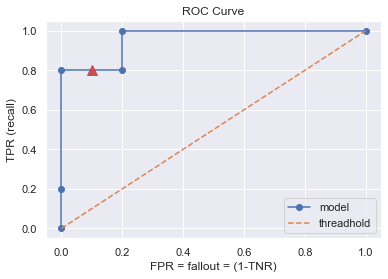

In [21]:
plt.plot(fpr, tpr, 'o-', label="model")
plt.plot([0, 1], [0, 1], '--', label="threadhold")
plt.plot(fallout, recall, 'r^', ms=10)
plt.xlabel('FPR = fallout = (1-TNR)')
plt.ylabel('TPR (recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

### plot_roc_curve()

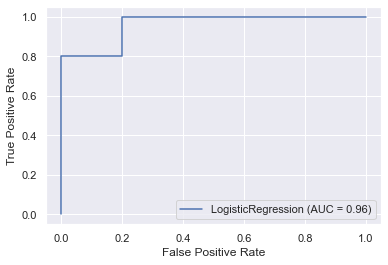

In [22]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X, y)
plt.show()

## AUC(Area Under the Curve)
* ROC curve 아래 면적

In [23]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9600000000000001

In [24]:
from sklearn.metrics import auc,roc_auc_score
roc_auc_score(y, model.predict_proba(X)[:, 1])

0.9600000000000001

## classification_report() vs. roc_curve()
* 정확도, 정밀도, 재현율, F1 점수가 같아도 roc_curve, auc 는 다를 수 있다
* ref : https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html

In [25]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [26]:
print(confusion_matrix(y, y_hat1))
print(confusion_matrix(y, y_hat2))

[[940   3]
 [ 30  27]]
[[940   3]
 [ 30  27]]


In [27]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [28]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



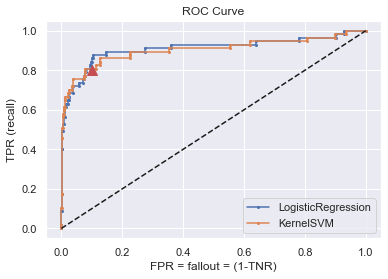

In [29]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="LogisticRegression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="KernelSVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="threadhold")
plt.plot(fallout, recall, 'r^', ms=10)
plt.xlabel('FPR = fallout = (1-TNR)')
plt.ylabel('TPR (recall)')
plt.title('ROC Curve')
plt.show()

In [30]:
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

#  Precision-Recall Trade-off

* Threshold를 좌측에 가깝게 잡으면 : TPR, FPR 모두 높은 상황 즉, 모든 값이 positive 분류된 상황이다. 
* Threshold를 우측에 가깝게 잡으면 : TPR, FPR 모두 낮은 상황 즉, 모든 값이 negative 분류된 상황이다.

<img src="https://blog.kakaocdn.net/dn/buhibz/btruXTZyiS2/zWnjxw6rYXNq9mqbA6sLY0/img.gif">

* 아래의 면적이 커지면 커질 수록 이상적인 2진 분류기

<img src="https://blog.kakaocdn.net/dn/bmtSzI/btru2wV4yw0/28T7KjpCoYo46X14FteAr1/img.gif">

## precision_recall_curv()

In [31]:
df = pd.read_csv("./dataset/pima_diabetes.csv")
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)
model = LogisticRegression().fit(X_train, y_train)
pred  = model.predict(X_test)
proba = model.predict_proba(X_test)

153 153 152


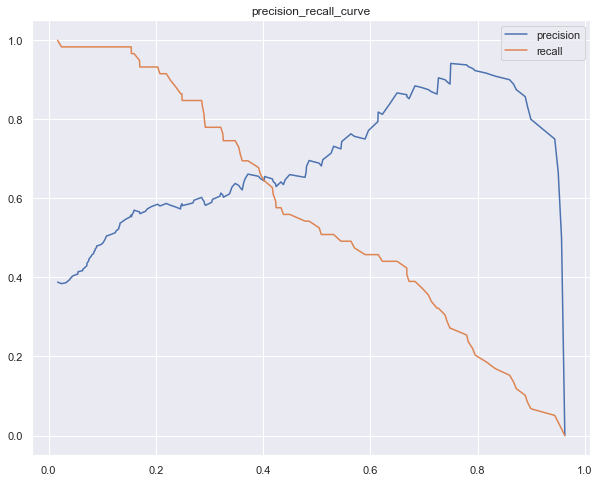

In [32]:
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

plt.figure(figsize=(10, 8))
pred_p = model.predict_proba(X_test)[:,1]
precision, recalls, th = precision_recall_curve(y_test, pred_p)
print(len(precision), len(recalls), len(th))

plt.plot(th, precision[:len(th)], label = 'precision')
plt.plot(th, recalls[:len(th)], label = 'recall')
plt.legend()
plt.title("precision_recall_curve")
plt.show()

## 임계치(thread 조절)
* Binarizer :  Threshold를 OO으로 잡고,  이상은 1로  이하는 0으로 바꿈

In [33]:
from sklearn.preprocessing import Binarizer

temp = [[ 1, -1,  2],
    [ 2,  0,  0],
    [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
bb = Binarizer(threshold=1.1)                     
print(bb.fit_transform(temp))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [34]:
MYTH__ = 0.5

print(proba[:5])
proba_p = proba[:,1].reshape(-1,1)
pred_bin = Binarizer(threshold=MYTH__).fit_transform(proba_p)
print(pred_bin[:5])

print(MYTH__)
print(  confusion_matrix(y_test,  pred_bin)   )
print(f"정확도: {accuracy_score(y_test, pred_bin):.4f}, 정밀도: {precision_score(y_test, pred_bin):.4f}, 재현율: {recall_score(y_test, pred_bin):.4f}, F1: {f1_score(y_test, pred_bin):.4f}")
    

[[0.94570893 0.05429107]
 [0.93640577 0.06359423]
 [0.2046344  0.7953656 ]
 [0.84611952 0.15388048]
 [0.27569196 0.72430804]]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]]
0.5
[[81 14]
 [28 31]]
정확도: 0.7273, 정밀도: 0.6889, 재현율: 0.5254, F1: 0.5962


In [35]:
def my_plot(MYTH__, PRED_BIN_P) :
    plt.figure(figsize=(4, 4))
    precision, recalls, th = precision_recall_curve(y_test, PRED_BIN_P)
    print(len(precision), len(recalls), len(th))

    plt.plot(th, precision[:len(th)], label = 'precision')
    plt.plot(th, recalls[:len(th)], label = 'recall')
    plt.legend()
    plt.title("precision_recall_curve")
    plt.show()

In [45]:
MYTH_LIST__ = [0.0, 0.2, 0.3, 0.5, 0.7, 1.0]  #0.0, 0.2, 0.3, 0.5, 0.7, 1.0
proba_p = proba[:,1].reshape(-1,1)
for MYTH__ in MYTH_LIST__:
    pred_bin = Binarizer(threshold=MYTH__).fit_transform(proba_p)
    print(MYTH__)
    print(  confusion_matrix(y_test,  pred_bin)   )
    print(f"정확도: {accuracy_score(y_test, pred_bin):.4f}, 정밀도: {precision_score(y_test, pred_bin):.4f}, 재현율: {recall_score(y_test, pred_bin):.4f}, F1: {f1_score(y_test, pred_bin):.4f}")
    print("---"*30)
    
    
   # 0.2 까지 내리면 점수 좋아지지만, 웬만해선 너무 많이 내리지 말기. 지금 데이터는 정상분포아니라서 어쩔수 없이 쓰는것.
   # 너무 내리면 과한 오버핏 이 나서 다른 데이터를 확인할 수 없을 수 있다. 
   # 공모전에서 점수 올리고 싶으면 최종으로 임계치 건드리면 됨.
   # ==> 1000명 중 암환자 5명 
#  암환자 만들고 싶으면 KNN으로 비슷한데이터 몇개 더 만들기  (만약 군집 내에 암환2자 섞여있으면 서포트벡터로 차원 변경해서 자르기)
# 그렇게 데이터 뻥튀기 한다음에 임계치 내리기...^^  =====> 이걸 해주는 함수 smote (반대는 nearmiss) => 근데 주로 smote 씀, 그리고 비율로 조절 가능, nearmiss 는 데이터 샘플이 작아질수있기 때문에 잘 사용안함
# smote = over sampling / nearmiss = under sampling


    
#     # my_plot(MYTH__,  pred_bin)
    
#     print(len(y_test), len(pred_bin))
#     print(y_test, pred_bin)
#     precision, recalls, th = precision_recall_curve(y_test, pred_bin)
#     print(len(precision), len(recalls), len(th))
    
#     # plt.plot(th, precision[:len(th)], label = 'precision')
#     # plt.plot(th, recalls[:len(th)], label = 'recall')
#     # plt.legend()
#     # plt.title("precision_recall_curve")
#     # plt.show()

0.0
[[ 0 95]
 [ 0 59]]
정확도: 0.3831, 정밀도: 0.3831, 재현율: 1.0000, F1: 0.5540
------------------------------------------------------------------------------------------
0.2
[[56 39]
 [ 4 55]]
정확도: 0.7208, 정밀도: 0.5851, 재현율: 0.9322, F1: 0.7190
------------------------------------------------------------------------------------------
0.3
[[63 32]
 [13 46]]
정확도: 0.7078, 정밀도: 0.5897, 재현율: 0.7797, F1: 0.6715
------------------------------------------------------------------------------------------
0.5
[[81 14]
 [28 31]]
정확도: 0.7273, 정밀도: 0.6889, 재현율: 0.5254, F1: 0.5962
------------------------------------------------------------------------------------------
0.7
[[92  3]
 [38 21]]
정확도: 0.7338, 정밀도: 0.8750, 재현율: 0.3559, F1: 0.5060
------------------------------------------------------------------------------------------
1.0
[[95  0]
 [59  0]]
정확도: 0.6169, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000
------------------------------------------------------------------------------------------
